In [15]:
import numpy as np
import pandas as pd
import re
import pyfaidx
import matplotlib.pyplot as plt

In [13]:
with open('PubMed_data.txt', encoding="utf8") as f:
    data = f.read()
data = re.sub(r'\n\s{6}', ' ', data)
print(data[:5000])


PMID- 26271952
OWN - NLM
STAT- MEDLINE
DCOM- 20160722
LR  - 20181113
IS  - 1878-7479 (Electronic)
IS  - 1933-7213 (Print)
IS  - 1878-7479 (Linking)
VI  - 12
IP  - 4
DP  - 2015 Oct
TI  - The Endocannabinoid System and its Modulation by Phytocannabinoids.
PG  - 692-8
LID - 10.1007/s13311-015-0374-6 [doi]
AB  - The endocannabinoid system is currently defined as the ensemble of the two  7-transmembrane-domain and G protein-coupled receptors for Δ(9)-tetrahydrocannabinol  (but not for most other plant cannabinoids or phytocannabinoids)-cannabinoid  receptor type-1 (CB1R) and cannabinoid receptor type-2 (CB2R); their two most  studied endogenous ligands, the "endocannabinoids" N-arachidonoylethanolamine  (anandamide) and 2-arachidonoylglycerol (2-AG); and the enzymes responsible for  endocannabinoid metabolism. However, anandamide and 2-AG, and also the  phytocannabinoids, have more molecular targets than just CB1R and CB2R. Furthermore,  the endocannabinoids, like most other lipid mediators

In [16]:
# las lineas utiles son las que esta con AD
direcciones = []
for ln in data.splitlines():
    if ln.startswith("AD  -"):
        direcciones.append(ln[:])
for i in range(2):
    print(direcciones[i])
len(direcciones)
    

AD  - Institute of Biomolecular Chemistry, Consiglio Nazionale delle Ricerche, Via Campi  Flegrei 34, Comprensorio Olivetti, 80078, Pozzuoli, NA, Italy. vdimarzo@icb.cnr.it.
AD  - Institute of Biomolecular Chemistry, Consiglio Nazionale delle Ricerche, Via Campi  Flegrei 34, Comprensorio Olivetti, 80078, Pozzuoli, NA, Italy.


4814

In [18]:
paises = []
for ln in data.splitlines():
    if ln.startswith("AD  -"):
        direcciones = ln[:]
        pais = re.findall(r'\,\s([\sA-Za-z{2:50}]+)\.', direcciones)
        paises.append(pais)

import itertools
paises = list(itertools.chain.from_iterable(paises))
print(paises[1:500])
len(paises)

['Italy', 'UK', 'UK', 'UK', 'UK', 'USA', 'USA', 'USA', 'USA', 'USA', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'UK', 'UK', 'UK', 'UK', 'Poland', 'Poland', 'Poland', 'Denmark', 'Denmark', 'South Africa', 'USA', 'USA', 'USA', 'Brazil', ' Switzerland', ' Switzerland', 'India', 'India', 'Poland', 'India', 'Brazil', 'Australia', 'Brazil', 'Poland', 'Poland', 'Poland', 'Poland', 'Poland', 'Poland', ' Canada', ' Canada', 'Canada', 'Ireland', 'Ireland', 'Ireland', 'Czech Republic', 'Italy', 'Italy', 'Via G', 'Italy', 'Via G', 'Italy', 'V', 'Italy', 'Italy', 'Zona Ind', 'Italy', 'Via G', 'Italy', 'Via G', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Via G', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'The Netherlands', 'The Netherlands', 'The Netherlands', 'The Netherlands', 'Italy', 'Israel', 'Spain', 'Spain', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Spain', 'Spain', 'Italy', 'Italy', 'Poland', 'Poland', 'Poland', '

5211

In [19]:
conjunto_paises = list(set(paises))
len(conjunto_paises)

227

In [101]:
archivo1 = open('coordenadas.csv')
print(archivo1.read())


country;latitude;longitude;name
AD;42.546.245;1.601.554;Andorra
AE;23.424.076;53.847.818;United Arab Emirates
AF;3.393.911;67.709.953;Afghanistan
AG;17.060.816;-61.796.428;Antigua and Barbuda
AI;18.220.554;-63.068.615;Anguilla
AL;41.153.332;20.168.331;Albania
AM;40.069.099;45.038.189;Armenia
AN;12.226.079;-69.060.087;Netherlands Antilles
AO;-11.202.692;17.873.887;Angola
AQ;-75.250.973;-0.071389;Antarctica
AR;-38.416.097;-63.616.672;Argentina
AS;-14.270.972;-170.132.217;American Samoa
AT;47.516.231;14.550.072;Austria
AU;-25.274.398;133.775.136;Australia
AW;1.252.111;-69.968.338;Aruba
AZ;40.143.105;47.576.927;Azerbaijan
BA;43.915.886;17.679.076;Bosnia and Herzegovina
BB;13.193.887;-59.543.198;Barbados
BD;23.684.994;90.356.331;Bangladesh
BE;50.503.887;4.469.936;Belgium
BF;12.238.333;-1.561.593;Burkina Faso
BG;42.733.883;2.548.583;Bulgaria
BH;25.930.414;50.637.772;Bahrain
BI;-3.373.056;29.918.886;Burundi
BJ;930.769;2.315.834;Benin
BM;32.321.384;-6.475.737;Bermuda
BN;4.535.277;114.727.669;B

In [21]:
coordenadas_paises = {}
with open ('coordenadas.txt') as f1:
    f1.readline()
    for line in f1:
        line = line.rstrip() 
        line = line.split("\t")
    
        coordenadas_paises[line[3]] = [float(line[1]),float(line[2])] 
coordenadas_paises
# len(coordenadas_paises)
 

{'Andorra': [42.546245, 1.601554],
 'UAE': [23.424076, 53.847818],
 'Afghanistan': [33.93911, 67.709953],
 'Antigua and Barbuda': [17.060816, -61.796428],
 'Anguilla': [18.220554, -63.068615],
 'Albania': [41.153332, 20.168331],
 'Armenia': [40.069099, 45.038189],
 'Netherlands Antilles': [12.226079, -69.060087],
 'Angola': [-11.202692, 17.873887],
 'Antarctica': [-75.250973, -0.071389],
 'Argentina': [-38.416097, -63.616672],
 'American Samoa': [-14.270972, -170.132217],
 'Austria': [47.516231, 14.550072],
 'Australia': [-25.274398, 133.775136],
 'Aruba': [12.52111, -69.968338],
 'Azerbaijan': [40.143105, 47.576927],
 'Bosnia and Herzegovina': [43.915886, 17.679076],
 'Barbados': [13.193887, -59.543198],
 'Bangladesh': [23.684994, 90.356331],
 'Belgium': [50.503887, 4.469936],
 'Burkina Faso': [12.238333, -1.561593],
 'Bulgaria': [42.733883, 25.48583],
 'Bahrain': [25.930414, 50.637772],
 'Burundi': [-3.373056, 29.918886],
 'Benin': [9.30769, 2.315834],
 'Bermuda': [32.321384, -64.757

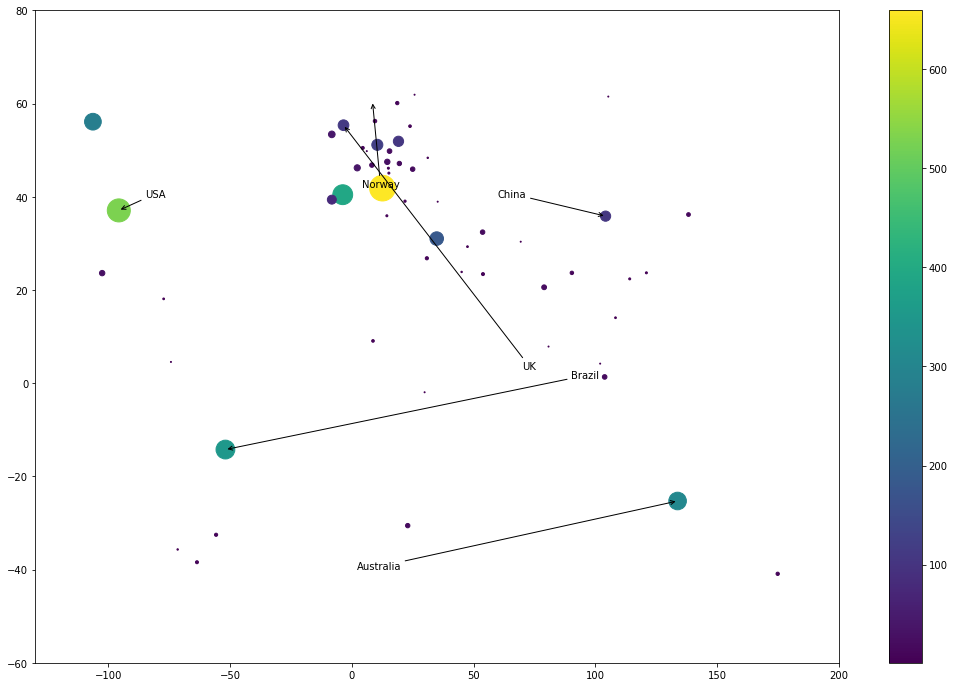

In [24]:
# conteo de paises 
lista_paises = []
longitud= []
latitud = []
conteo_pais = []
for z in conjunto_paises:
    if z in coordenadas_paises.keys():
        lista_paises.append(z)
        latitud.append(coordenadas_paises[z][0])
        longitud.append(coordenadas_paises[z][1])
        conteo_pais.append(paises.count(z))
%matplotlib inline
plt.scatter(longitud, latitud, s = conteo_pais, c = conteo_pais )
plt.colorbar()
plt.xlim(-130,200)
plt.ylim(-60,80)

ard = dict(arrowstyle = "->")
plt.annotate('USA',xy =  (-95.712891, 37.09024 ), xytext = (-85,40), arrowprops = ard)
plt.annotate('Norway',xy =  (8.468946, 60.472024 ), xytext = (4,42), arrowprops = ard)
plt.annotate('UK',xy =  (-3.435973, 55.378051 ), xytext = (70,3), arrowprops = ard)
plt.annotate('Brazil',xy =  (-51.92528, -14.235004 ), xytext = (90,1), arrowprops = ard)
plt.annotate('China',xy =  (104.195397, 35.86166 ), xytext = (60,40), arrowprops = ard)
plt.annotate('Australia',xy =  (133.77513, -25.274398), xytext = (2, -40), arrowprops = ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1]*3))
plt.show()


        
